## Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('bjsample1000.xlsx')

In [3]:
df.head(5)

,DTUP,SDIST,FAREA,BED,BATH,LIV,DIST_CBD,DIST_CENTER,BN500
0,40886.220,558.33545,131.37,3,2,1,2747.15876,8225.87910,30
1,27734.275,603.46985,59.59,2,1,0,2463.13235,5455.54550,24
2,28393.690,865.78906,48.02,1,1,1,8609.97951,5528.21274,67
3,33236.010,340.77704,135.75,3,2,2,11458.12545,12515.88728,33
4,33183.953,2037.08520,87.53,2,1,1,10678.96460,15338.37896,6


In [4]:
df.shape

(1000, 9)

In [5]:
df.columns

Index(['DTUP', 'SDIST', 'FAREA', 'BED', 'BATH', 'LIV', 'DIST_CBD',
       'DIST_CENTER', 'BN500'],
      dtype='object')

In [7]:
df['BED'].unique()

array([3, 2, 1, 4], dtype=int64)

## Exploring Data

In [8]:
df.describe()

,DTUP,SDIST,FAREA,BED,BATH,LIV,DIST_CBD,DIST_CENTER,BN500
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39559.514878,1072.928137,83.093920,2.008000,1.167000,1.175000,14032.010547,13602.825569,23.498000
std,15826.308119,1110.323446,32.645346,0.713053,0.399087,0.531656,8136.549782,7718.335350,17.620172
min,12604.085000,42.986150,18.780000,1.000000,1.000000,0.000000,1115.593230,1454.690820,0.000000
25%,27798.522500,490.200267,59.597500,2.000000,1.000000,1.000000,8218.439657,7398.410660,11.000000
50%,36083.148500,750.460750,76.430000,2.000000,1.000000,1.000000,12595.036635,11505.659460,20.000000
75%,48765.116250,1182.101475,97.420000,2.000000,1.000000,1.000000,19267.782710,18200.842635,33.000000
max,102117.625000,9496.877000,276.940000,4.000000,3.000000,4.000000,40867.810930,38468.409990,149.000000


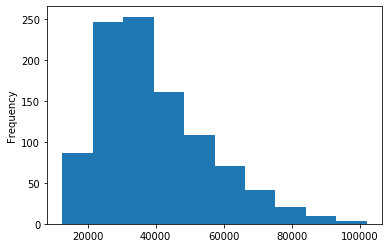

In [9]:
df['DTUP'].plot(kind = 'hist')

In [10]:
bed_stat = df.groupby('BED').mean()
bed_stat

,DTUP,SDIST,FAREA,BATH,LIV,DIST_CBD,DIST_CENTER,BN500
BED,,,,,,,,
1,42697.513393,958.181755,55.935043,1.017094,0.816239,12416.859847,12653.850674,23.414530
2,38828.959431,1093.865938,79.849556,1.077778,1.190741,14207.993436,13572.179635,23.914815
3,38291.331338,1141.085694,113.654857,1.471429,1.476190,15137.990698,14411.285294,22.304762
4,34967.441875,1149.875259,188.677500,2.375000,1.937500,17198.177525,17904.849803,26.312500


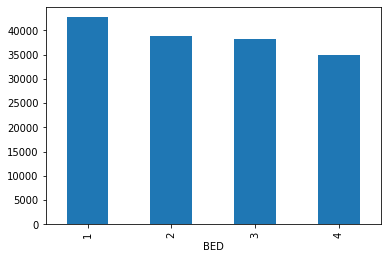

In [11]:
bed_stat['DTUP'].plot(kind = 'bar')

In [12]:
bed_count = df['BED'].value_counts()
bed_count

2    540
1    234
3    210
4     16
Name: BED, dtype: int64

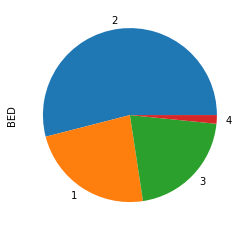

In [13]:
bed_count.plot(kind = 'pie')

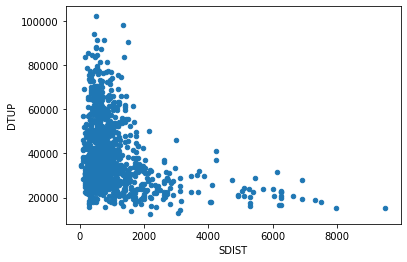

In [19]:
df.plot(kind = 'scatter', x = 'SDIST', y = 'DTUP')

In [22]:
import matplotlib.pyplot as plt

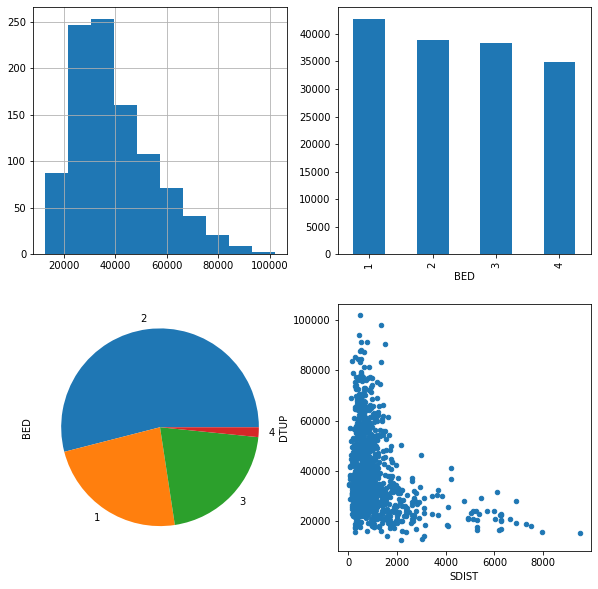

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

df['DTUP'].hist(ax = ax[0,0])

bed_stat['DTUP'].plot.bar(ax = ax[0,1])

bed_count.plot.pie(ax = ax[1,0])

df.plot.scatter(x = 'SDIST', y = 'DTUP', ax = ax[1,1])

plt.savefig('four_subplots.png', dpi = 200)

## Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['SDIST', 'FAREA', 'BED', 'BATH', 'LIV', 'DIST_CBD',
       'DIST_CENTER', 'BN500']], df['DTUP'], random_state = 10987)

## Choosing and Creating a Model

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

## Training

In [26]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.coef_

array([-1.64760285e+00, -9.71596161e+01, -6.10975600e+01,  4.08886871e+03,
        2.05150986e+03,  5.29878709e-01, -1.55969511e+00, -2.75108020e+01])

## Testing

In [28]:
y_pred = lm.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

173844069.0561523

In [30]:
lm.score(X_test, y_test)

0.29950883048232413

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.29950883048232413